# Model Training

## Import Data and required libraries

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

### Importing data

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Handling Categorical Vlaues

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Seperating categorical and numerical values

In [4]:
X = df.drop(columns=["math_score"])
y = df["math_score"]

In [5]:
cat_columns = X.select_dtypes(include="object").columns
num_columns = X.select_dtypes(exclude="object").columns

print(cat_columns)
print(num_columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
Index(['reading_score', 'writing_score'], dtype='object')


### Transforming categorical values into numerical values and standardizing numerical values

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [("one_hot_encoder", ohe, cat_columns), ("standard_scaler", scaler, num_columns)],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [7]:
X_transformed = preprocessor.fit_transform(X)
X_transformed.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,reading_score,writing_score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


## Model Training

### Split data into train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Model Evaluation

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}

model_list = list(models.keys())
r2_list = []

for m in model_list:
    model = models[m]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    r2_list.append(model_test_r2)

    print(f"Model: {m}")

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-" * 30)

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print("=" * 30)

    print("\n")

Model: Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3321
- Mean Absolute Error: 4.2710
- R2 Score: 0.8739
------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4360
- Mean Absolute Error: 4.2287
- R2 Score: 0.8786


Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Model: K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-------

In [11]:
pd.DataFrame(
    list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]
).sort_values(by=["R2 Score"], ascending=False).reset_index(drop=True)

,Model Name,R2 Score
0,Ridge,0.880593
1,Linear Regression,0.878565
2,CatBoosting Regressor,0.851632
3,Random Forest Regressor,0.851088
4,AdaBoost Regressor,0.845133
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.735348
9,SVR,0.728600


Best Model: **Ridge**

In [12]:
model = Ridge(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred)

model_test_r2

0.8805931485028741

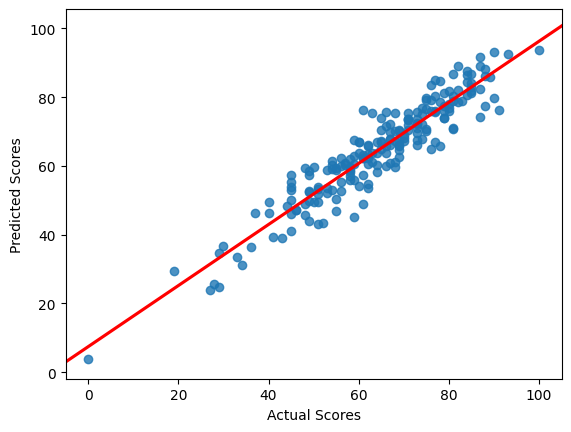

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_test, y=y_pred, ci=None, truncate=False, line_kws={"color": "red"})
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()

## Hyper Parameter Tuning

In [14]:
# Performing hyperparameter tuning on RandomForestRegressor
rfr = RandomForestRegressor()

param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [None, 5, 7, 9, 10]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9, 10],
                         'n_estimators': [50, 100, 200]})

In [15]:
grid_search.best_score_

0.8381925852068719

In [16]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_pred)

0.8624890837573367

In [17]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8]
}

model = CatBoostRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


0:	learn: 14.0821927	total: 496us	remaining: 98.7ms
1:	learn: 13.2254683	total: 1.04ms	remaining: 103ms
2:	learn: 12.3968062	total: 1.44ms	remaining: 94.7ms
3:	learn: 11.6624233	total: 1.9ms	remaining: 93.1ms
4:	learn: 11.0763325	total: 2.36ms	remaining: 92.2ms
5:	learn: 10.5433833	total: 2.75ms	remaining: 89ms
6:	learn: 10.0801296	total: 3.13ms	remaining: 86.3ms
7:	learn: 9.6784697	total: 3.5ms	remaining: 84ms
8:	learn: 9.3091854	total: 3.86ms	remaining: 82ms
9:	learn: 8.9823288	total: 4.22ms	remaining: 80.3ms
10:	learn: 8.5894923	total: 4.57ms	remaining: 78.6ms
11:	learn: 8.2684907	total: 4.92ms	remaining: 77.1ms
12:	learn: 7.9951952	total: 5.27ms	remaining: 75.9ms
13:	learn: 7.7198095	total: 5.62ms	remaining: 74.7ms
14:	learn: 7.5156522	total: 5.96ms	remaining: 73.6ms
15:	learn: 7.3093326	total: 6.31ms	remaining: 72.6ms
16:	learn: 7.1147384	total: 6.67ms	remaining: 71.8ms
17:	learn: 6.9730464	total: 7ms	remaining: 70.8ms
18:	learn: 6.8007697	total: 7.39ms	remaining: 70.4ms
19:	learn

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E511D74650>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.5]},
             scoring='r2')

In [18]:
grid_search.best_params_, grid_search.best_score_

({'depth': 4, 'iterations': 200, 'learning_rate': 0.1}, 0.8554014196815656)

In [19]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8723142311308393

In [20]:
param_grid = {
    "alpha": [1, 5, 10, 100],
    "fit_intercept":[True, False],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [21]:
grid_search.best_params_, grid_search.best_score_

({'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'},
 0.8686151720680433)

In [22]:
model = grid_search.best_estimator_
y_test = model.predict(X_test)
r2_score(y_test, y_pred)

0.9832479422381265

## Conclusion

- The best model is the **Ridge** model with `alpha=1` and `solver='sparse_cg'` gives an accuracy of 98% and the highest cross-validation score of 86%